# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [448]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [449]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [450]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

X (100, 3)  y  (100,)


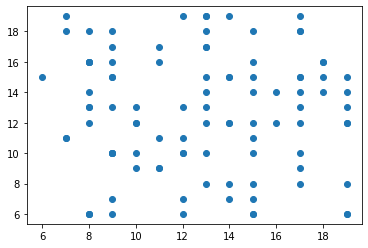

In [451]:
print('X', X.shape ,' y ', y.shape)
plt.scatter(X[:,2],X[:,1])

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [452]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + np.exp(-z))


1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [453]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    return -1/len(y) * np.sum((y * np.log(Sigmoid(np.matmul(X,theta))) + (1 - y) * np.log(1 - Sigmoid(np.matmul(X,theta)))))
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    
def computeCost_novec(X, y, theta):
    pass

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [463]:

def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        theta=np.subtract(theta,alpha * 1/len(y) * np.sum(np.dot(X.T, np.subtract(Sigmoid(X.dot(theta)), y)),axis=1).reshape(-1,1))
        theta0[i]=theta[0]
        theta1[i]=theta[1]
        theta2[i]=theta[2]
        costs[i]=computeCost(X,y,theta)
    return theta
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [464]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [465]:
initialCost=computeCost(X, y, theta)
initialCost

69.31471805599453

Appel des la fonction de calcul du gradient

In [466]:
# paramètres
iterations = 1500;
alpha = 0.1;
# Appel
costs = np.zeros(iterations)
theta0 = np.zeros(iterations)
theta1 = np.zeros(iterations)
theta2 = np.zeros(iterations)
theta = gradientDescent(X, y, theta, alpha, iterations);

<ipython-input-453-708aab7878e1>:3: RuntimeWarning: divide by zero encountered in log
  return -1/len(y) * np.sum((y * np.log(Sigmoid(np.matmul(X,theta))) + (1 - y) * np.log(1 - Sigmoid(np.matmul(X,theta)))))
<ipython-input-453-708aab7878e1>:3: RuntimeWarning: invalid value encountered in multiply
  return -1/len(y) * np.sum((y * np.log(Sigmoid(np.matmul(X,theta))) + (1 - y) * np.log(1 - Sigmoid(np.matmul(X,theta)))))
<ipython-input-452-69798fe5e3bf>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [467]:
theta

array([[ 5. ],
       [63.2],
       [63.8]])

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [468]:
def drawLine():
  c = -theta[0]/theta[2]
  m = -theta[1]/theta[2]
  
  # Plot the data and the classification with the decision boundary.
  xmin, xmax = X.min(), X.max()
  
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  plt.plot(xd, yd)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

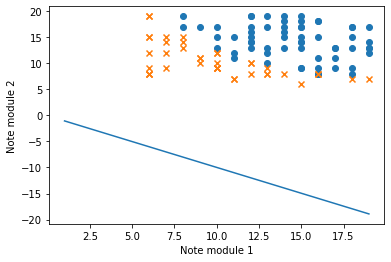

In [469]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
drawLine()

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [470]:
# Predire pour des notes note1= 9 et note2=17


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [471]:
# bonne chance